In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Experiment classical approach for sketch masking

## Load the image

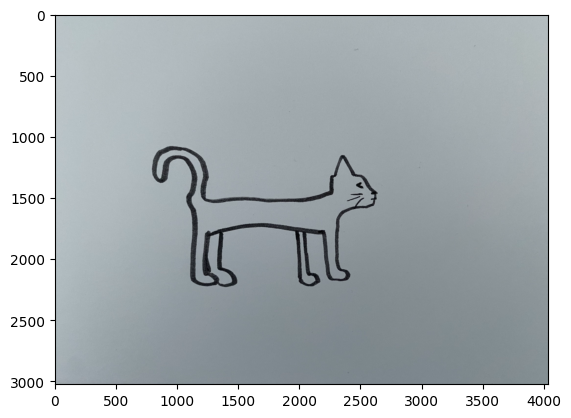

In [2]:
test_img = cv2.imread("test_image_2.jpg")
plt.imshow(test_img)
plt.show()

## Grayscale

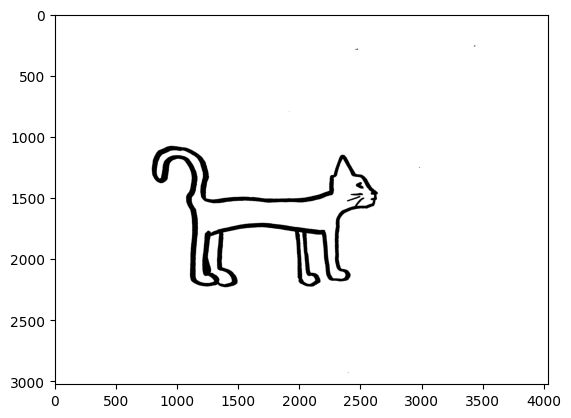

In [3]:
grayscale_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
blurred_image = cv2.GaussianBlur(grayscale_img, (15, 15), 0)
binary_image = cv2.adaptiveThreshold(
    blurred_image, 
    1, 
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY, 
    1023,  # Adjusted blockSize
    15    # Adjusted constant C
)
plt.imshow(binary_image,cmap="gray")
plt.show()

## Morphological closing


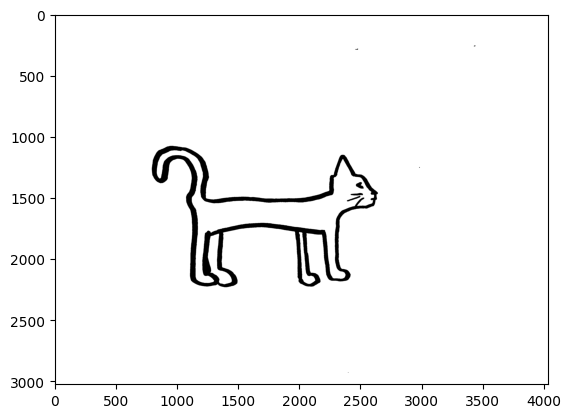

In [4]:
kernel = np.ones((3,3),np.uint8)
closed_img = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
plt.imshow(closed_img, cmap='gray')
plt.show()

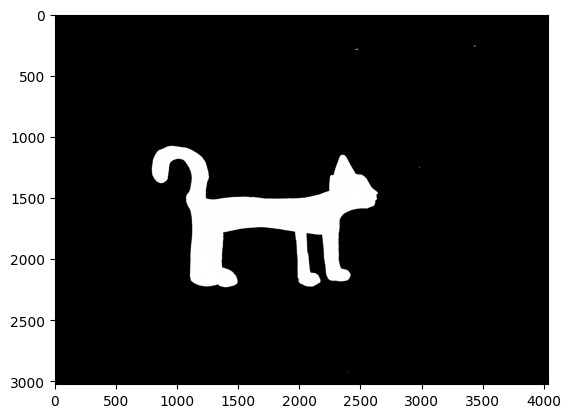

In [5]:
h, w = closed_img.shape[:2]
mask = np.zeros((h+2,w+2),np.uint8)
cv2.floodFill(closed_img, mask, (0, 0), 255)
inverted_img = cv2.bitwise_not(closed_img)
plt.imshow(inverted_img,cmap='gray')
plt.show()

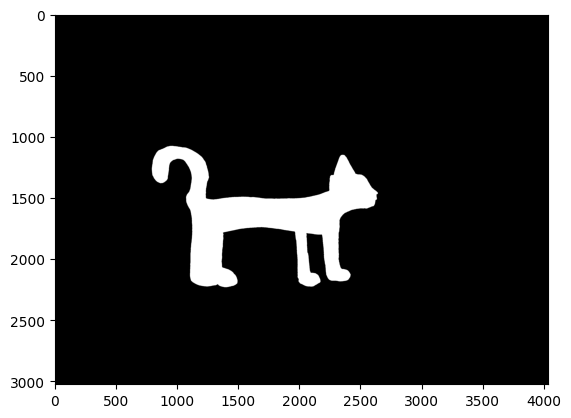

In [6]:
contours, _ = cv2.findContours(inverted_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
areas = [cv2.contourArea(c) for c in contours]
max_index = np.argmax(areas)
largest_contour_image = np.zeros_like(grayscale_img)
cv2.drawContours(largest_contour_image, contours, max_index, 255, thickness=cv2.FILLED)
plt.imshow(largest_contour_image, cmap="gray")
plt.show()